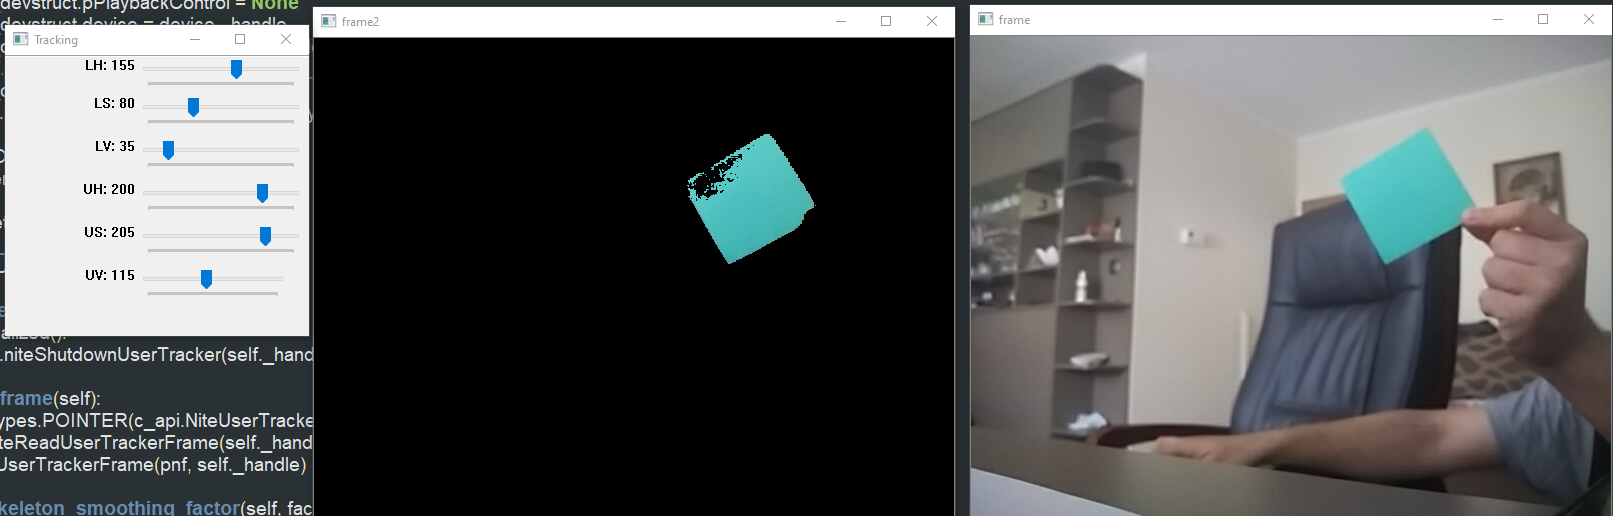

In [14]:
from IPython.display import Image
Image(filename='Images/Color_detection.png') 

In [13]:
import cv2
import numpy as np
cap = cv2.VideoCapture(0)

#cv2.namedWindow("Trakcing")

def nothing(x):
    pass

cv2.namedWindow("Tracking")

cv2.createTrackbar("L_R","Tracking",0,255,nothing)
cv2.createTrackbar("L_G","Tracking",0,255,nothing)
cv2.createTrackbar("L_B","Tracking",0,255,nothing)

cv2.createTrackbar("H_R","Tracking",255,255,nothing)
cv2.createTrackbar("H_G","Tracking",255,255,nothing)
cv2.createTrackbar("H_B","Tracking",255,255,nothing)



while(True):
    # Capture frame-by-frame
    ret, frame = cap.read()

    
    L_R = cv2.getTrackbarPos("L_R", "Tracking")
    L_G = cv2.getTrackbarPos("L_G", "Tracking")
    L_B = cv2.getTrackbarPos("L_B", "Tracking")
    
    H_R = cv2.getTrackbarPos("H_R", "Tracking")
    H_G = cv2.getTrackbarPos("H_G", "Tracking")
    H_B = cv2.getTrackbarPos("H_B", "Tracking")
    
    l_b = np.array([L_R,L_G,L_B])
    u_b = np.array([H_R,H_G,H_B])

    mask = cv2.inRange(frame, l_b,u_b)
    res = cv2.bitwise_and(frame,frame,mask=mask)

    # Display the resulting frame
    cv2.imshow('frame',frame)
    cv2.imshow('frame2',res)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()